In [1]:
import torch
from torch.utils import data

from utils.dlc_practical_prologue import generate_pair_sets
from utils.metrics import accuracy
from utils.nn_utils import train_model

from models.LeNet import lenet
from models.LinearReluNet import linear_relu_net
from models.SimpleConvNet import simple_conv_net
from models.ResNet import residual_net
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from models.LinearReluNet import LinearReluNet

plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  

In [2]:
# Data related global variables
N = 1000  # Number of pairs

DATA_TENSORS = generate_pair_sets(N)

# Neural nets parameters
NN_ARGS = {"input_size": 14 * 14, "num_classes": 10}
BATCH_SIZE = 100
NUM_EPOCHS = 25

In [3]:
# Datasets
train_input,train_target,train_classes,test_input,test_target,test_classes = DATA_TENSORS

train_dataset = data.TensorDataset(train_input, train_classes)
test_dataset = data.TensorDataset(test_input, test_classes) 
# Dataset Loader (Input Batcher)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

models = [linear_relu_net(**NN_ARGS) , lenet() ,simple_conv_net() ,residual_net()]

In [4]:
def plot_train_test(model,  NUM_EPOCHS, train_loader,test_loader):
    model_name = str(model).partition('\n')[0][:-1]
    if (model_name == 'LinearReluNet'):
        losses, losses_t = train_model(model, NUM_EPOCHS, train_loader,test_loader)
    else : 
        losses, losses_t = train_model(model, NUM_EPOCHS, train_loader,test_loader, False)
    x = list(np.arange(1, NUM_EPOCHS+1))
    plt.figure(figsize=(15, 8))
    plt.plot(losses, '--', label = 'Training loss')
    plt.plot(losses_t, '--', label = 'Test loss')
    plt.legend()
    plt.ylabel('Average Cross Entropy Loss')
    plt.xlabel("Number of epochs")
    plt.title('Cross entropy loss vs number of epochs using ' + model_name )

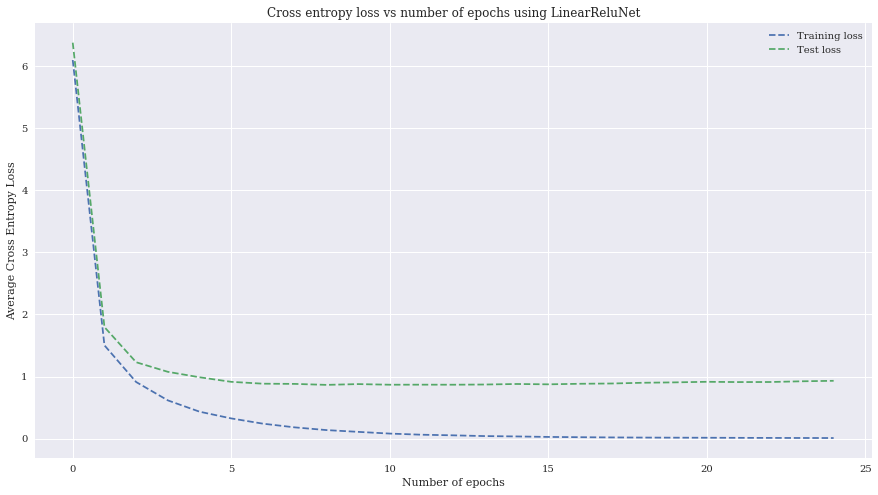

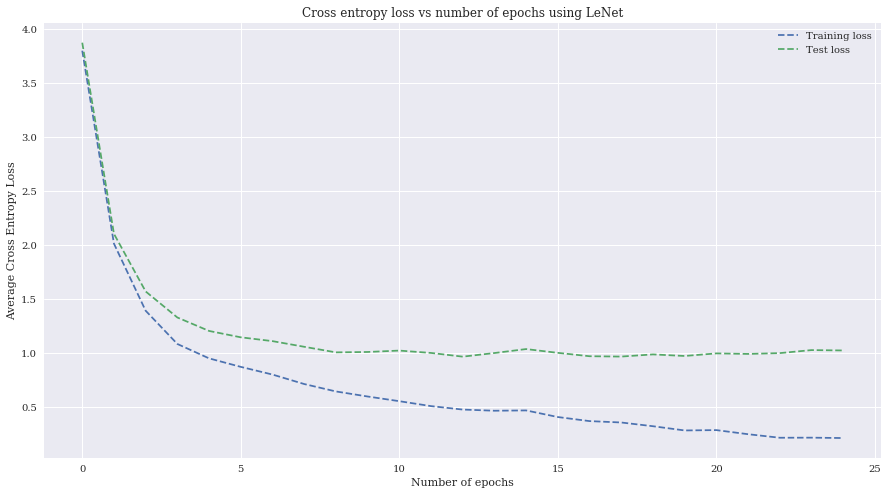

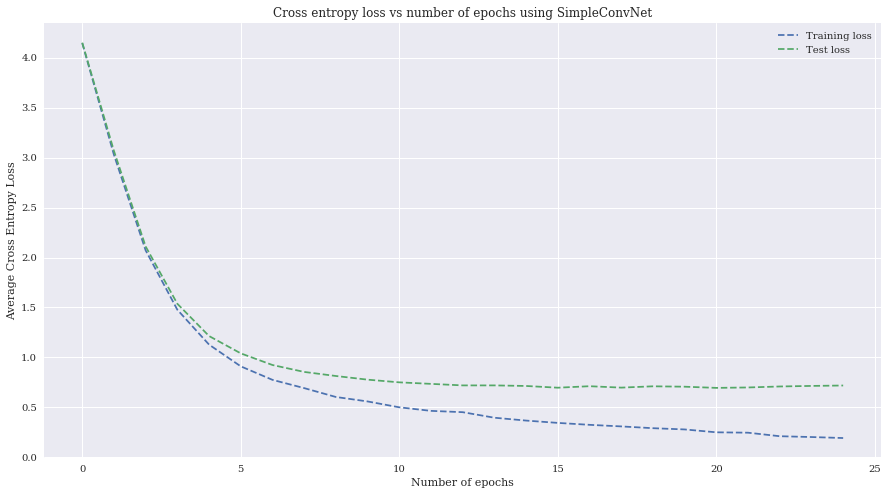

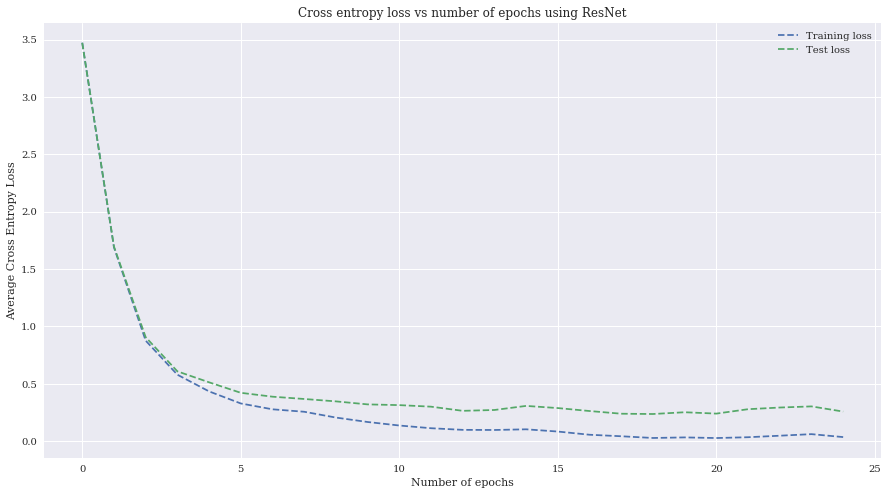

In [5]:
for m in models :
    plot_train_test(m, NUM_EPOCHS, train_loader, test_loader)

In [6]:
test_accuracy_d = data.TensorDataset(test_input, test_target)
test_loader = torch.utils.data.DataLoader(dataset=test_accuracy_d, batch_size=BATCH_SIZE, shuffle=False)
for m in models :
    model_name = str(m).partition('\n')[0][:-1]
    if (model_name == 'LinearReluNet'):
         print('The accuracy for ' + model_name + ': {}'.format(accuracy(m, test_loader)))
    else : 
        print('The accuracy for ' + model_name + ': {}'.format(accuracy(m, test_loader, flatten=False)))

The accuracy for LinearReluNet: 0.939
The accuracy for LeNet: 0.913
The accuracy for SimpleConvNet: 0.933
The accuracy for ResNet: 0.968
